Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nazar Yaremko"
COLLABORATORS = ""

---

# CS110 Pre-class Work 11.1

The pre-class work for this session will focus on the rod cutting problem. Recall that the rod cutting problem takes as an input the length n of a rodand a table of prices $p_i$ for $i = 1,2,... n$, and one needs to determine the maximum revenue $r$ obtainable by cutting up the rod and selling the pieces. 

## Part A. 

You will implement in Python two solutions to the rod cutting problem, namely:

## Question 1. 
A recursive top-down solution to the rod cutting problem. Please complete the cut_rod function below:


In [13]:
def cut_rod(p,n):
    #if the length is 0, return 0
    if n == 0:
        return 0
    #initializing q to be the smallest possible values
    q = -float('inf')
    #for every piece of the rod
    for i in range(0, n):
        #we recursively call on the function and find the biggest combination of the cuts
        q = max(q, p[i] + cut_rod(p, n-i-1))
    return q

In [14]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1

#results from textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    assert(cut_rod(p,i)==r[i])

## Question 2.

An optimal rod cutting solution using dynamic programming (see figure [here](https://drive.google.com/open?id=1nu9gETKX4KJCHZDi17fZLQtkDVig81Zk) for inspiration). Please complete the following two functions: 


In [21]:
def extended_bottom_up_cut_rod(p,n):
    #creating new two lists to store info
    #r is created to store the max profit for each subproblem
    #s stores the most optimal cuts 
    r = list(range(n+1))
    s = list(range(n+1))
    #setting the first value to be 0
    r[0] = 0
    #for every piece of the rod
    for j in range(1, n+1):
        #we set the q to be the smallest possible values
        q = -float('inf')
        #now as we move thorugh the rod, we check every combination at every step and update our q 
        #thee biggest value and the most optimal cut end up in s and r
        for i in range(j):
            if q < (p[i] + r[j-i-1]):
                q = (p[i]+r[j-i-1])
                s[j] = i+1
        r[j] = q
    return r, s

extended_bottom_up_cut_rod([2,8,8,9,10,17,17,20,24,30],10)

([0, 2, 8, 10, 16, 18, 24, 26, 32, 34, 40], [0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [23]:
def print_cut_rod_solution(p,n):
    #here we use the preevious function
    (r, s) = extended_bottom_up_cut_rod(p,n)
    while n>0:
        #printing the optimal solution (in terms of cutting the rod)
        print(s[n])
        n = n-s[n]

print_cut_rod_solution([2,8,8,9,10,17,17,20,24,30],10)

2
2
2
2
2


In [86]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
r, s = extended_bottom_up_cut_rod(p,10)
assert(r==R)
assert(s==S)

## Part B - Experiments

## Question 1.

Use the function below to generate a list of prices of length n=20 and assign that list to a new variable, `P`. You MUST use this list for parts 2 and 3 below.


In [87]:
import numpy as np
def generate_price_list(n):
    """Generates a price list of length n
    
    Inputs:
    - n: integer, length of the list, must be positive
    
    Outputs:
    - p: list, the ordered price list for each rod cut
    """
    #here we generate a list of pieces of 20
    p = [1]
    for i in range(1,n):
        np.random.seed(0)
        p.append(np.random.randint(p[i-1]+1, i*3+1))
    return p


## Question 2.

Time (using the time library) the implementation of `cut_rod` for different rod lengths for values of up to $n=20.$ Present your results in a plot. 


In [93]:
import time
t1 = []
for i in range(1, 21):
    #recording time for the recursive function
    lst = generate_price_list(i)
    a = time.time()
    cut_rod(lst, i)
    b = time.time()
    t1.append(b-a)

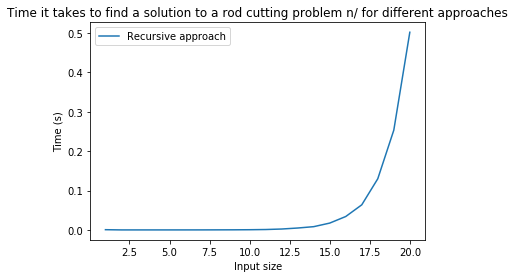

In [91]:
import matplotlib.pyplot as plt
#plotting the graph
x = list(range(1, 21))
plt.plot(x,t1,label = "Recursive approach")
plt.title("Time it takes to find a solution to a rod cutting problem n/ for different approaches")
plt.ylabel("Time (s)")
plt.xlabel("Input size")
plt.legend(loc="upper left")
plt.show()

## Question 3.

Time (using the time library) the implementation of `extended_bottom_up_cut_rod` for different rod lengths for values of up to $n=20$. Add the curve corresponding to this algorithm to the previous plot.

In [94]:
import time
t2 = []
for i in range(1, 21):
    #recording time fo the bottom-up dynamic programming approach 
    lst = generate_price_list(i)
    a = time.time()
    extended_bottom_up_cut_rod(lst, i)
    b = time.time()
    t2.append(b-a)

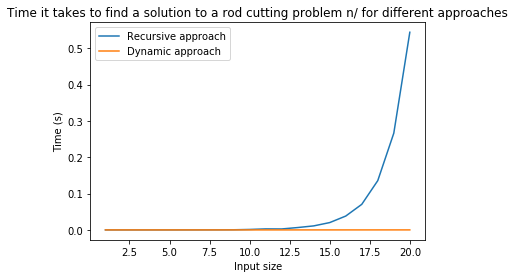

In [95]:
x = list(range(1, 21))
plt.plot(x,t1,label = "Recursive approach")
plt.plot(x,t2,label = "Dynamic approach")
plt.title("Time it takes to find a solution to a rod cutting problem n/ for different approaches")
plt.ylabel("Time (s)")
plt.xlabel("Input size")
plt.legend(loc="upper left")
plt.show()

## Question 4.

Contrast both curves. What can you conclude?

Time complexity for the dynamic approach is significantly lower because the dynamic approach does not rely solely on the computational power, but takes record of the solutions that have already been found to increase the efficiency of the algorithm.

## Part C - After completing your experiments above, answer the following questions:

## Question 1.
Estimate how big $n$ has to be before the non-dynamic-programming version will take a million years to finish. Call this value N.

In [111]:
a = time.time()
2+22
b = time.time()
print(b-a)

3.0279159545898438e-05


Given the infromation from the reading, time complexity of the non-dynamic approach is $θ(2^{n})$. This means that we need to. know how long does one operation takes, and then calculate what number of operations is needed for the overal time to be million years. In the previous cell I estimated that one operation takes approacimately  $4 * 10^{-5}$ seconds. Therefore, in million years ($3.1536 * 10^{13}$ seconds) we can perform $3.1536 * 10^{13}/4 * 10^{-5} = 7.884 * 10^{17}$ operations. This means equal to that $2^{n}$ must be $7.884 * 10^{17}$ which means that $n = log_{2}(7.884 * 10^{17}) = 59.45$. Thus, N must be around 60!

## Question 2.
Estimate (or time) how long it takes to evaluate `extended_bottom_up_cut_rod(p,N)`, where `N` is the value you got from the previous question. 

Given that the time complexity of the dynamic approach is $θ(n^{2})$, it means that the algorithm will require $60^{2} = 3600$ operations. Given the previous estimate of how long one operations takes, it would take $3600 * 4 * 10^{-5} = 0.144$ seconds. 

## [Optional]  Question 3. 
Do you notice anything peculiar about the solution for large n?

YOUR ANSWER HERE